# U2: Ejemplo de speech recognition

In [28]:
# system libraries
import os
import sys

# data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# audio
import IPython.display as ipd
from IPython.display import Audio, display, Markdown
import librosa
import librosa.display

# speech-to-text
import speech_recognition as sperec

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### RAVDESS dataset

One of the more common dataset used because of its quality of speakers, recording and it has 24 actors of different genders. Filename identifiers:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [78]:

RAVD ="C:/Users/andyl/SensoresInteligentes/ActorAudioCDSI/"

In [85]:
dirl_list = os.listdir(RAVD)
dirl_list.sort()

emotion = []
gender = []
path = []
for i in dirl_list:
    if not i.startswith('.'):
        fname = os.listdir(RAVD + i)
        for f in fname:
            part = f.split('.')[0].split('-')
            emotion.append(int(part[2]))
            temp = int(part[6])
            if temp%2 == 0:
                temp = "female"
            else:
                temp = "male"
            gender.append(temp)
            path.append(RAVD + i + '/' + f)

        
RAVD_df = pd.DataFrame(emotion)
RAVD_df = RAVD_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAVD_df = pd.concat([pd.DataFrame(gender),RAVD_df],axis=1)
RAVD_df.columns = ['gender','emotion']
RAVD_df['labels'] =RAVD_df.gender + '_' + RAVD_df.emotion
RAVD_df['source'] = 'RAVDESS'  
RAVD_df = pd.concat([RAVD_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAVD_df = RAVD_df.drop(['gender', 'emotion'], axis=1)
RAVD_df.labels.value_counts()

labels
male_calm          96
male_happy         96
male_sad           96
male_angry         96
male_fear          96
male_disgust       96
male_surprise      96
female_calm        96
female_happy       96
female_sad         96
female_angry       96
female_fear        96
female_disgust     96
female_surprise    96
male_neutral       48
female_neutral     48
Name: count, dtype: int64

## Exploratory analysis 

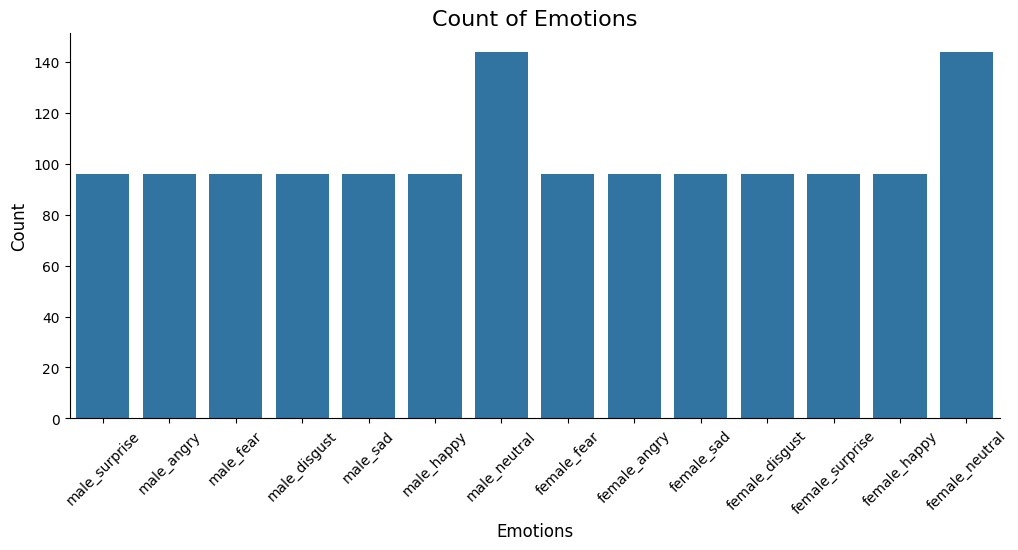

In [4]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(RAVD_df, x="labels")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Reading audio file

In [5]:
# Female Happy
file = 'Actor_08/03-01-03-02-02-01-08.wav'
fRA1= RAVD + file
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

In [6]:
recognizer = sperec.Recognizer()

# Function to convert speech from an audio file to text
def speech_to_text_from_file(audio_file):
    try:
        with sperec.AudioFile(audio_file) as source:
            audio = recognizer.record(source)
            text = recognizer.recognize_google(audio, language='en-US')
            return text

    except sperec.RequestError as e:
        return f"Error with the speech recognition service: {e}"

speech_text = speech_to_text_from_file(fRA1)
display(Markdown(f"Recognized Text: {speech_text}"))

Recognized Text: dogs are sitting by the door

## Mel Spectrograms

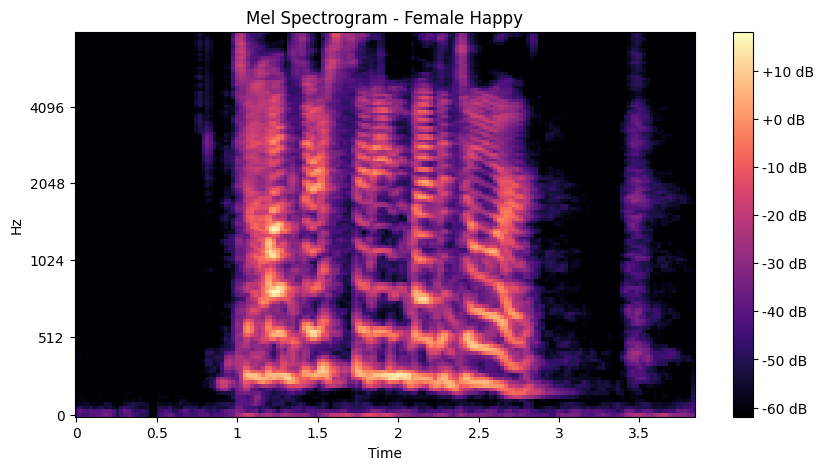

In [7]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Happy')
plt.colorbar(format='%+2.0f dB')

In [8]:
#Female Fear
fRA2=RAVD +'Actor_08/03-01-06-01-01-01-08.wav'
data, sr = librosa.load(fRA2)
ipd.Audio(fRA2) 

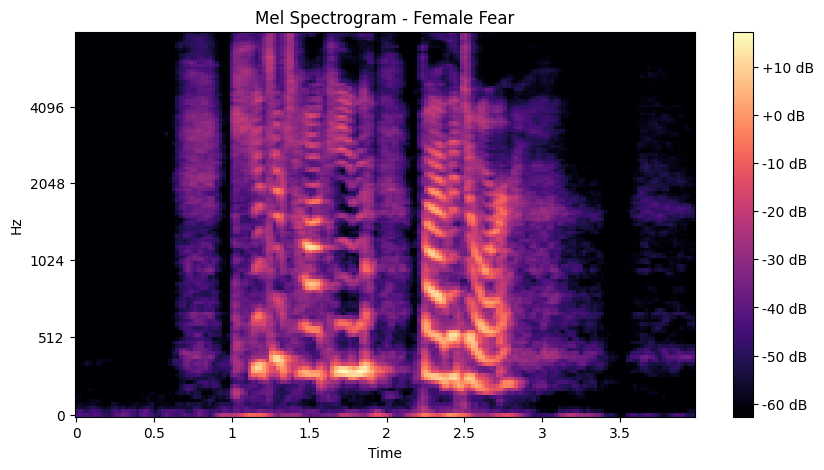

In [9]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fear')
plt.colorbar(format='%+2.0f dB');

In [10]:
# Female Disgust
fRA1 =RAVD +'Actor_20/03-01-08-02-02-02-20.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

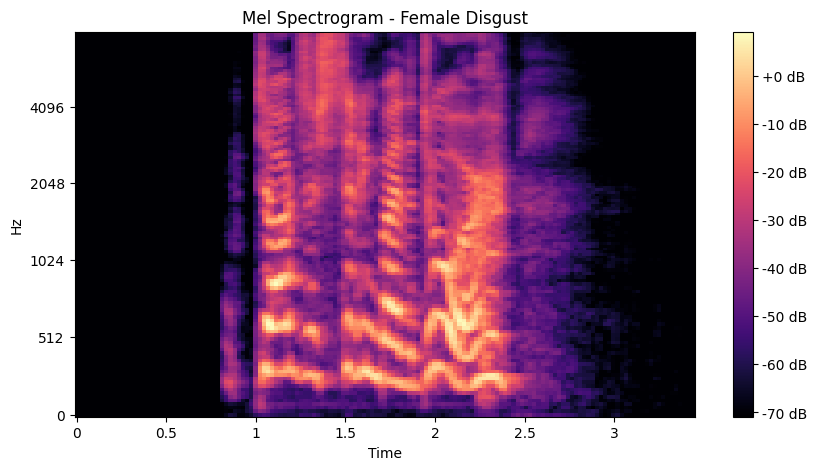

In [11]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Disgust')
plt.colorbar(format='%+2.0f dB');

In [12]:
# Male Fearfull
fRA1 = RAVD + 'Actor_19/03-01-04-01-02-01-19.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

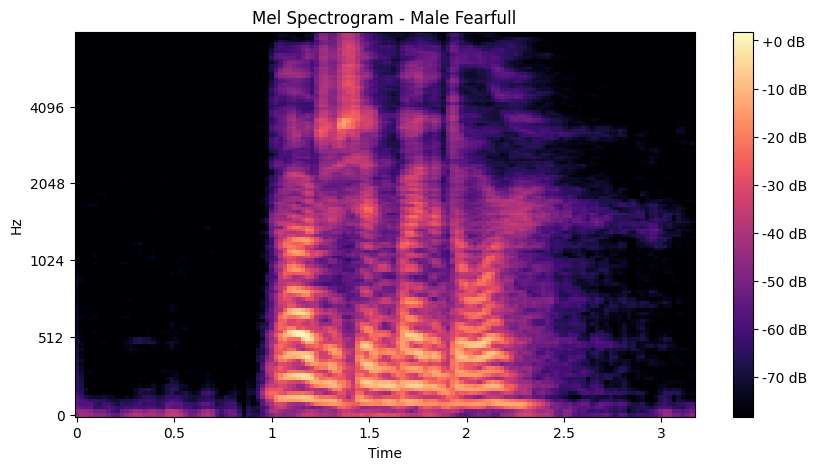

In [13]:
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Fearfull')
plt.colorbar(format='%+2.0f dB');

## Mel Frequency Cepstral Coeﬃcients (MFCC)

In [60]:
n_coeff = 12

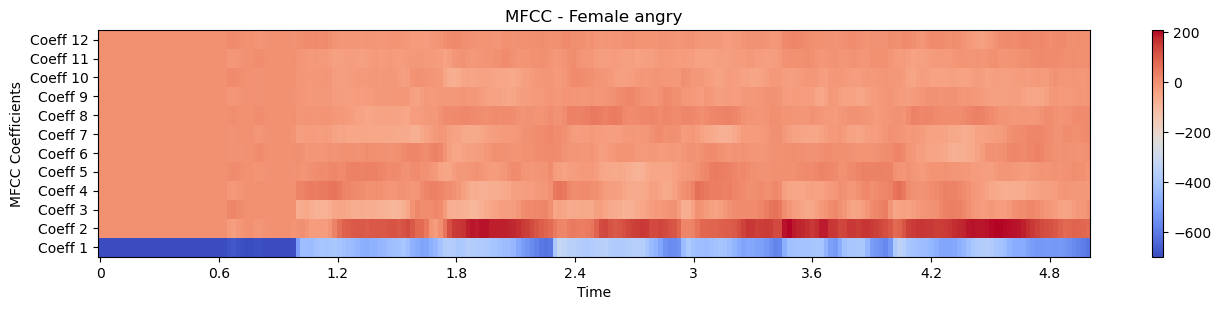

In [62]:
# Gender - Female; Emotion - Angry 
path = RAVD + "Actor_18/03-01-05-01-01-01-18.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff) #change n_mfcc

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(n_coeff), [f'Coeff {i+1}' for i in range(n_coeff)])
plt.title('MFCC - Female angry')
plt.colorbar()
plt.show()

ipd.Audio(path)

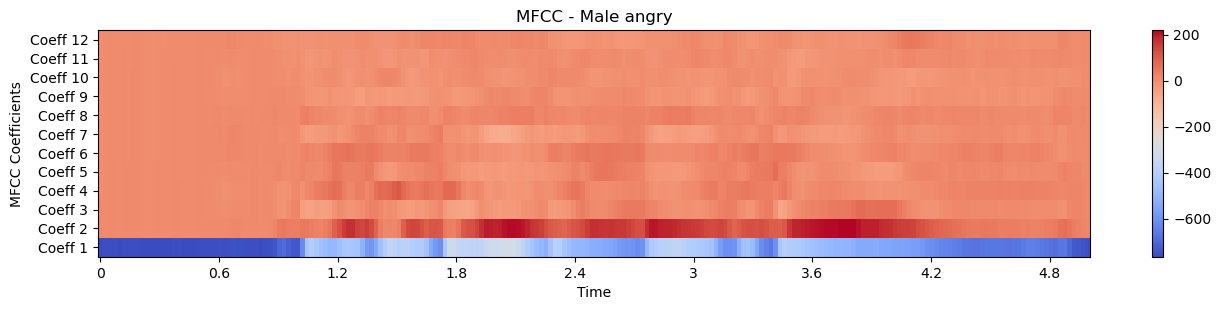

In [64]:
# Gender - Male; Emotion - Angry 
path = RAVD + "Actor_17/03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)

plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC Coefficients')
plt.yticks(range(n_coeff), [f'Coeff {i+1}' for i in range(n_coeff)])
plt.title('MFCC - Male angry')
plt.colorbar()
plt.show()

ipd.Audio(path)

### Comparison of mean MFCC between Genders

216
216


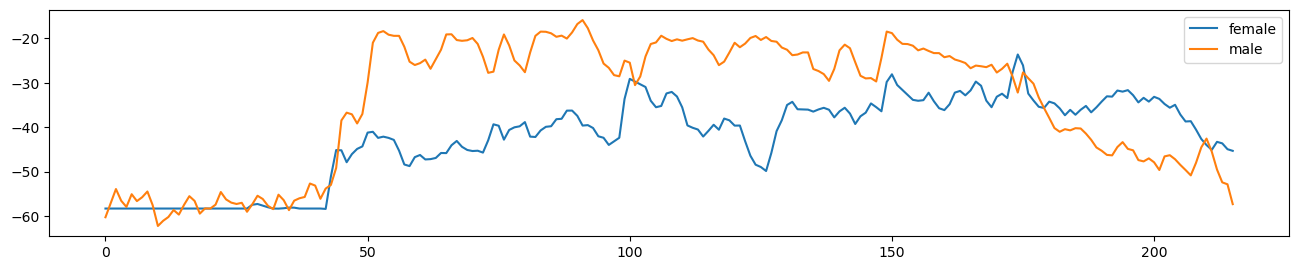

In [68]:
# Gender - Female; Emotion - angry
path = RAVD + "Actor_18/03-01-05-01-01-01-18.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5) 
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff), axis=0)
print(len(female))

# Gender - Male; Emotion - angry
path = RAVD + "Actor_17/03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


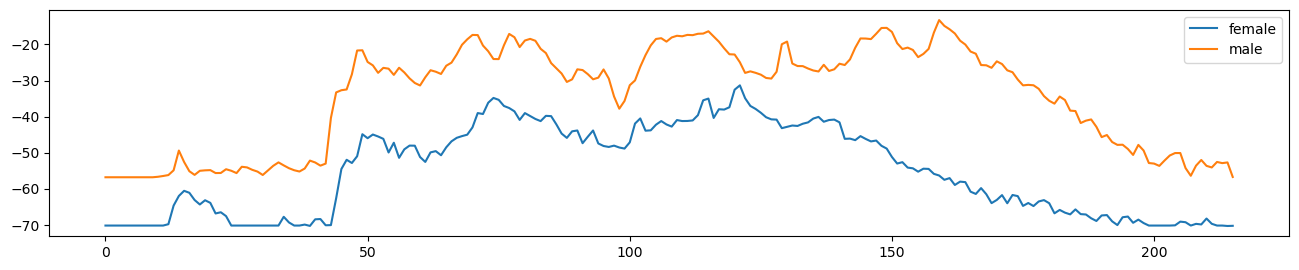

In [70]:
# Gender - Female; Emotion - Surprised
path = RAVD + "Actor_20/03-01-08-02-01-02-20.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff), axis=0)
print(len(female))

# Gender - Male; Emotion - Surprised
path = RAVD + "Actor_21/03-01-08-02-01-01-21.wav"
X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=n_coeff), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

## Data augmentation

In [72]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

In [74]:
# Trying different functions above
path = np.array(RAVD_df['path'])[471]
data, sample_rate = librosa.load(path)

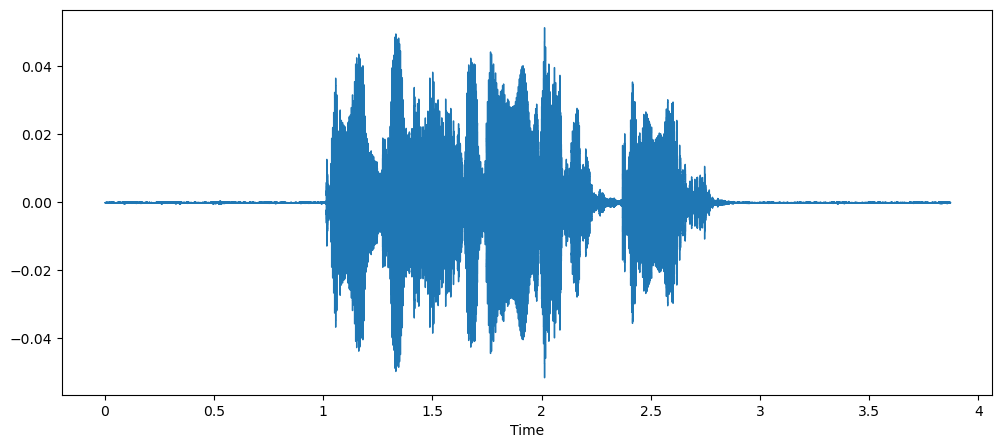

In [76]:
# Original audio
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

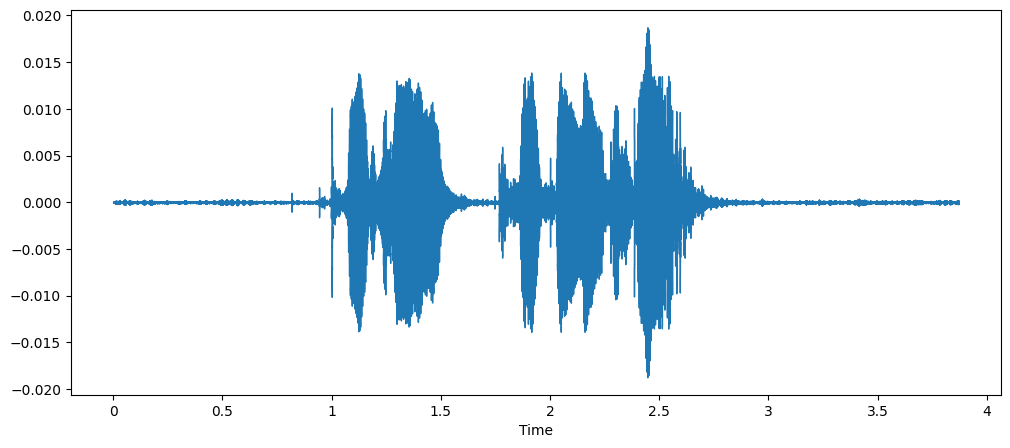

In [22]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

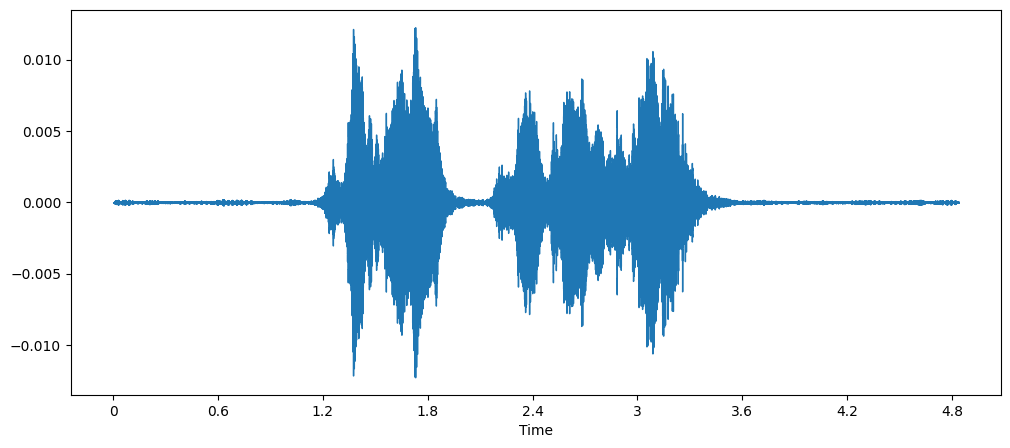

In [23]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

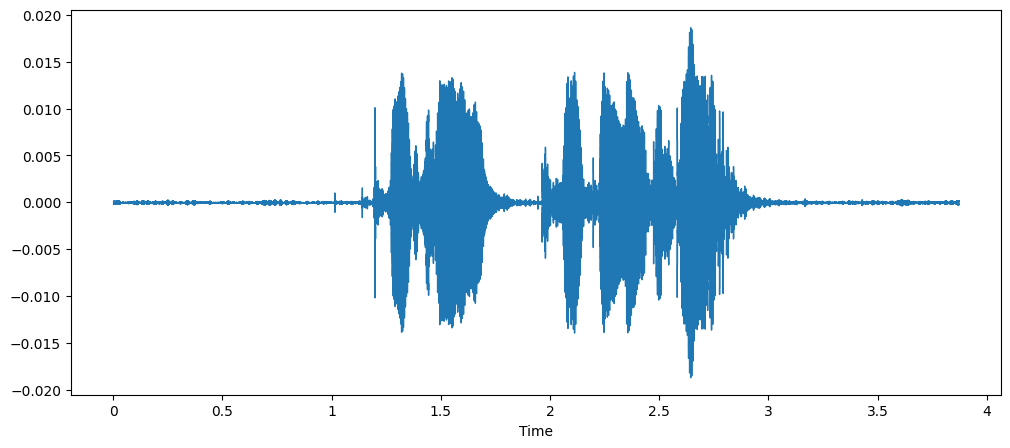

In [24]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

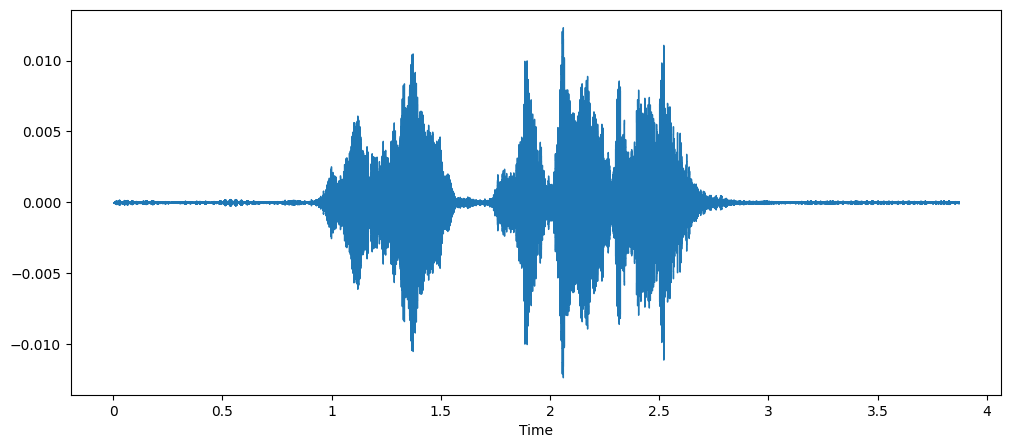

In [25]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature extraction

In [80]:
def feat_ext(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [82]:
RAVD_df.head()

labels   source                                               path
0  male_neutral  RAVDESS  C:/Users/andyl/SensoresInteligentes/ActorAudio...
1  male_neutral  RAVDESS  C:/Users/andyl/SensoresInteligentes/ActorAudio...
2  male_neutral  RAVDESS  C:/Users/andyl/SensoresInteligentes/ActorAudio...
3  male_neutral  RAVDESS  C:/Users/andyl/SensoresInteligentes/ActorAudio...
4  male_neutral  RAVDESS  C:/Users/andyl/SensoresInteligentes/ActorAudio...

In [84]:
X, Y = [], []
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [88]:
Emotions = pd.DataFrame(X)
Emotions['labels'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0          1         2          3          4         5         6  \
0 -645.880737  72.619637  0.841305  16.399446  10.241591  0.653901 -4.328002   
1 -430.607017  28.394065  8.439804   8.500800   5.202633 -0.848360 -2.901224   
2 -712.554138  70.982567 -0.730791  16.815754   7.991097 -0.822035 -6.391328   
3 -634.663269  72.324066 -2.998578  20.209740  10.674218 -1.151011 -2.813592   
4 -524.472111  46.140784  4.062451  14.256431   7.610531 -2.145167 -3.594358   

          7          8         9  ...        11        12        13        14  \
0 -4.258932 -14.575824 -3.806285  ... -4.042665  2.519602 -4.972247  0.566447   
1 -5.888525  -8.090637 -5.685263  ... -1.753022 -2.082735 -2.180946 -0.621493   
2 -6.146841 -15.975542 -0.313774  ... -3.398325  2.348432 -6.031354  1.242991   
3 -7.923956 -16.231958 -2.627547  ... -4.167823  0.719305 -4.954944 -0.688254   
4 -8.818403 -12.859878 -4.633027  ... -3.044045 -1.618190 -3.385582 -1.919486   

         15        16        17        18        19        labels  
0  1.035527 -5.416451 -2.449469 -1.782306 -1.212806  male_neutral  
1 -0.433994 -3.304405 -2.511155  0.261550 -2.189463  male_neutral  
2 -1.837347 -5.671210 -3.115795 -1.071987 -4.964169  male_neutral  
3  0.114427 -6.475233 -1.695712 -2.899729  0.377745  male_neutral  
4 -0.301073 -5.457218 -3.152529 -0.611171 -1.417444  male_neutral  

[5 rows x 21 columns]

In [90]:
# can use this directly from saved feature .csv file
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

0          1         2          3          4         5         6  \
0 -645.880737  72.619637  0.841305  16.399446  10.241591  0.653901 -4.328002   
1 -430.607017  28.394065  8.439804   8.500800   5.202633 -0.848360 -2.901224   
2 -712.554138  70.982567 -0.730791  16.815754   7.991097 -0.822035 -6.391328   
3 -634.663269  72.324066 -2.998578  20.209740  10.674218 -1.151011 -2.813592   
4 -524.472111  46.140784  4.062451  14.256431   7.610531 -2.145167 -3.594358   

          7          8         9  ...        11        12        13        14  \
0 -4.258932 -14.575824 -3.806285  ... -4.042665  2.519602 -4.972247  0.566447   
1 -5.888525  -8.090637 -5.685263  ... -1.753022 -2.082735 -2.180946 -0.621493   
2 -6.146841 -15.975542 -0.313774  ... -3.398325  2.348432 -6.031354  1.242991   
3 -7.923956 -16.231958 -2.627547  ... -4.167823  0.719305 -4.954944 -0.688254   
4 -8.818403 -12.859878 -4.633027  ... -3.044045 -1.618190 -3.385582 -1.919486   

         15        16        17        18        19        labels  
0  1.035527 -5.416451 -2.449469 -1.782306 -1.212806  male_neutral  
1 -0.433994 -3.304405 -2.511155  0.261550 -2.189463  male_neutral  
2 -1.837347 -5.671210 -3.115795 -1.071987 -4.964169  male_neutral  
3  0.114427 -6.475233 -1.695712 -2.899729  0.377745  male_neutral  
4 -0.301073 -5.457218 -3.152529 -0.611171 -1.417444  male_neutral  

[5 rows x 21 columns]

## Data partitioning

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [32]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['labels'].values

In [33]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [34]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 14), (1080, 20), (1080, 14))

In [35]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 14), (1080, 20), (1080, 14))

## Training and evaluating models

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(x_train,y_train)
y_pred = clf1.predict(x_test)

print("Decision tree score: {:.3f}".format(clf1.score(x_test, y_test)))

Decision tree score: 0.405


In [38]:
clf2=KNeighborsClassifier(n_neighbors=4)
clf2 = clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)

print("kNN score: {:.3f}".format(clf2.score(x_test, y_test)))

kNN score: 0.472


In [39]:
clf3=RandomForestClassifier()
clf3=clf3.fit(x_train,y_train)
y_pred=clf3.predict(x_test)

print("Random forest score: {:.3f}".format(clf3.score(x_test, y_test)))

Random forest score: 0.191
